In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
os.getcwd()
df= pd.read_csv("/Users/shaktisingh/Documents/Python for data science/income.csv")

In [2]:
data=df.copy()
data.info()
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            31978 non-null  int64 
 1   JobType        31978 non-null  object
 2   EdType         31978 non-null  object
 3   maritalstatus  31978 non-null  object
 4   occupation     31978 non-null  object
 5   relationship   31978 non-null  object
 6   race           31978 non-null  object
 7   gender         31978 non-null  object
 8   capitalgain    31978 non-null  int64 
 9   capitalloss    31978 non-null  int64 
 10  hoursperweek   31978 non-null  int64 
 11  nativecountry  31978 non-null  object
 12  SalStat        31978 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB
age              0
JobType          0
EdType           0
maritalstatus    0
occupation       0
relationship     0
race             0
gender           0
capitalgain      0
capitalloss      0
hoursp

In [3]:
# for numerical variables
summary=data.describe()
print(summary)

                age   capitalgain   capitalloss  hoursperweek
count  31978.000000  31978.000000  31978.000000  31978.000000
mean      38.579023   1064.360623     86.739352     40.417850
std       13.662085   7298.596271    401.594301     12.345285
min       17.000000      0.000000      0.000000      1.000000
25%       28.000000      0.000000      0.000000     40.000000
50%       37.000000      0.000000      0.000000     40.000000
75%       48.000000      0.000000      0.000000     45.000000
max       90.000000  99999.000000   4356.000000     99.000000


In [4]:
# for categorical variables 
summary_cat=data.describe(include='O')
print(summary_cat)

         JobType    EdType        maritalstatus       occupation relationship  \
count      31978     31978                31978            31978        31978   
unique         9        16                    7               15            6   
top      Private   HS-grad   Married-civ-spouse   Prof-specialty      Husband   
freq       22286     10368                14692             4038        12947   

          race gender   nativecountry                        SalStat  
count    31978  31978           31978                          31978  
unique       5      2              41                              2  
top      White   Male   United-States   less than or equal to 50,000  
freq     27430  21370           29170                          24283  


In [5]:
#freq of each categories
data['JobType'].value_counts()

JobType
 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 ?                    1809
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64

In [6]:
data['occupation'].value_counts()

occupation
 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1966
 ?                    1816
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
Name: count, dtype: int64

In [7]:
#cheking for unique classes
print(np.unique(data['JobType']))
print(np.unique(data['occupation']))

[' ?' ' Federal-gov' ' Local-gov' ' Never-worked' ' Private'
 ' Self-emp-inc' ' Self-emp-not-inc' ' State-gov' ' Without-pay']
[' ?' ' Adm-clerical' ' Armed-Forces' ' Craft-repair' ' Exec-managerial'
 ' Farming-fishing' ' Handlers-cleaners' ' Machine-op-inspct'
 ' Other-service' ' Priv-house-serv' ' Prof-specialty' ' Protective-serv'
 ' Sales' ' Tech-support' ' Transport-moving']


In [8]:
data=pd.read_csv("/Users/shaktisingh/Documents/Python for data science/income.csv",na_values=[" ?"])

In [9]:
#Data pre-processing--droping rows containing null values

data.isnull().sum()
missing=data[data.isnull().any(axis=1)]
data2=data.dropna(axis=0)

In [10]:
data2.count()

age              30162
JobType          30162
EdType           30162
maritalstatus    30162
occupation       30162
relationship     30162
race             30162
gender           30162
capitalgain      30162
capitalloss      30162
hoursperweek     30162
nativecountry    30162
SalStat          30162
dtype: int64

In [11]:
#Cheking correlation between variables
#checking gender proportion
gender=pd.crosstab(index=data2["gender"],
                   columns='count',
                   normalize=True)
print(gender)

col_0       count
gender           
 Female  0.324315
 Male    0.675685


In [12]:
#gender vs salarystatus
gen_vs_salstat=pd.crosstab(index=data2['gender'],
                           columns=data2['SalStat'],
                           margins=True,
                           normalize='index')
print(gen_vs_salstat)

SalStat   greater than 50,000   less than or equal to 50,000
gender                                                      
 Female              0.113678                       0.886322
 Male                0.313837                       0.686163
All                  0.248922                       0.751078


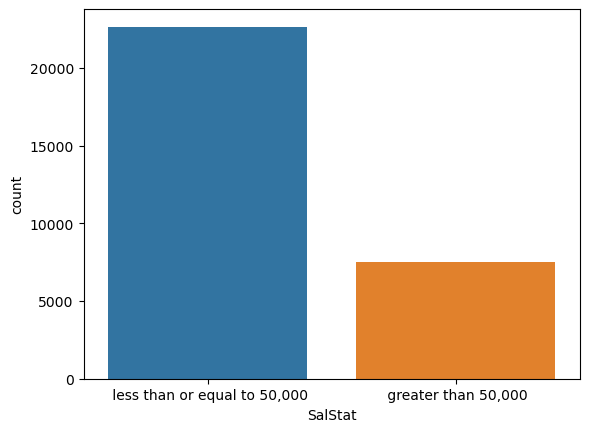

In [13]:
#Freq distribution of salarystatus 
salstat=sns.countplot(data=data2,x='SalStat')

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='Count'>

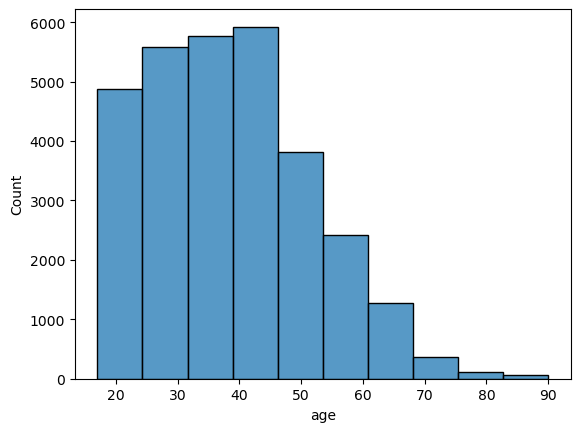

In [14]:
#for age distribution
sns.histplot(data2['age'],bins=10,kde=False)
## People with age 20-45 are high in frequency

<Axes: xlabel='SalStat', ylabel='age'>

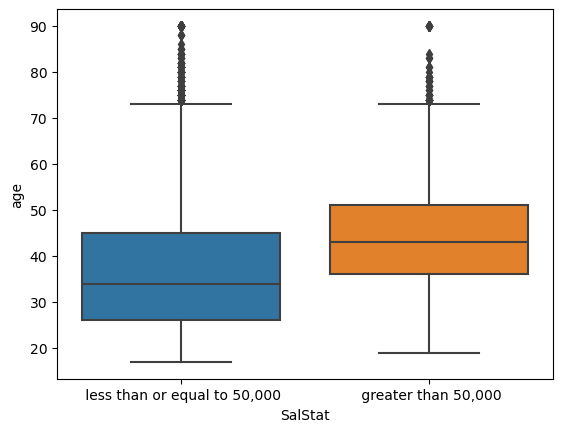

In [15]:
#Age vs salarystatus
sns.boxplot(x='SalStat',y='age',data=data2)

In [16]:
data2.groupby('SalStat')['age'].median()

SalStat
 greater than 50,000             43.0
 less than or equal to 50,000    34.0
Name: age, dtype: float64

In [17]:
#jobtype vs salarystatus
jobtype_vs_salstat=pd.crosstab(index=data2['JobType'],
                               columns=data2['SalStat'],
                               margins=True,
                               normalize='index')
print(jobtype_vs_salstat)

SalStat             greater than 50,000   less than or equal to 50,000
JobType                                                               
 Federal-gov                   0.387063                       0.612937
 Local-gov                     0.294630                       0.705370
 Private                       0.218792                       0.781208
 Self-emp-inc                  0.558659                       0.441341
 Self-emp-not-inc              0.285714                       0.714286
 State-gov                     0.268960                       0.731040
 Without-pay                   0.000000                       1.000000
All                            0.248922                       0.751078


In [18]:
#education vs salarystatus
edtype_vs_alstat=pd.crosstab(index=data2['EdType'],
                               columns=data2['SalStat'],
                               margins=True,
                               normalize='index')
print(edtype_vs_alstat)

SalStat         greater than 50,000   less than or equal to 50,000
EdType                                                            
 10th                      0.071951                       0.928049
 11th                      0.056298                       0.943702
 12th                      0.076923                       0.923077
 1st-4th                   0.039735                       0.960265
 5th-6th                   0.041667                       0.958333
 7th-8th                   0.062837                       0.937163
 9th                       0.054945                       0.945055
 Assoc-acdm                0.253968                       0.746032
 Assoc-voc                 0.263198                       0.736802
 Bachelors                 0.421491                       0.578509
 Doctorate                 0.746667                       0.253333
 HS-grad                   0.164329                       0.835671
 Masters                   0.564229                       0.43

In [19]:
#occupation vs salarystatus
occupation_vs_salstat=pd.crosstab(index=data2['occupation'],
                               columns=data2['SalStat'],
                               margins=True,
                               normalize='index')
print(occupation_vs_salstat)

SalStat              greater than 50,000   less than or equal to 50,000
occupation                                                             
 Adm-clerical                   0.133835                       0.866165
 Armed-Forces                   0.111111                       0.888889
 Craft-repair                   0.225310                       0.774690
 Exec-managerial                0.485220                       0.514780
 Farming-fishing                0.116279                       0.883721
 Handlers-cleaners              0.061481                       0.938519
 Machine-op-inspct              0.124619                       0.875381
 Other-service                  0.041096                       0.958904
 Priv-house-serv                0.006993                       0.993007
 Prof-specialty                 0.448489                       0.551511
 Protective-serv                0.326087                       0.673913
 Sales                          0.270647                       0

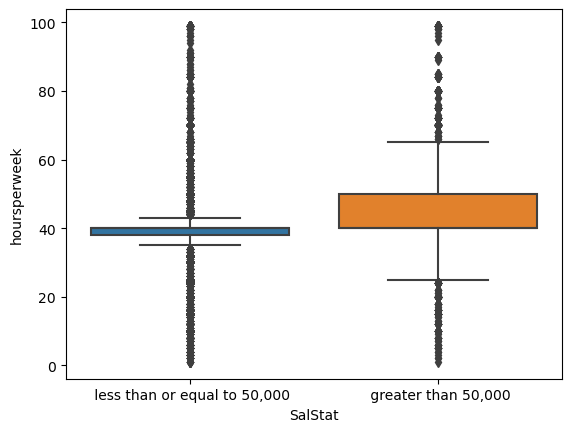

In [20]:
#hoursperweek vs salarystatus
hoursperweek=sns.boxplot(y='hoursperweek',x='SalStat',data=data2)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


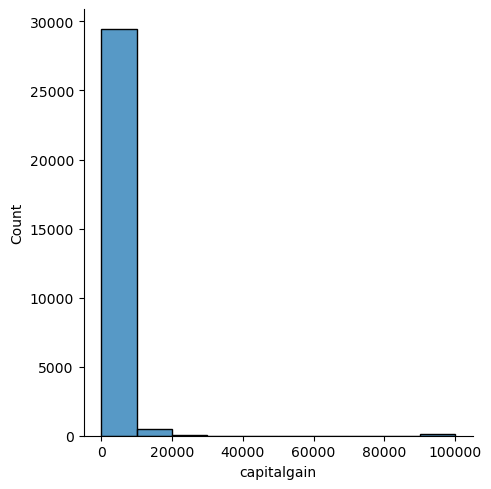

In [21]:
#capital gain and loss
sns.displot(data2['capitalgain'],bins=10,kde=False)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


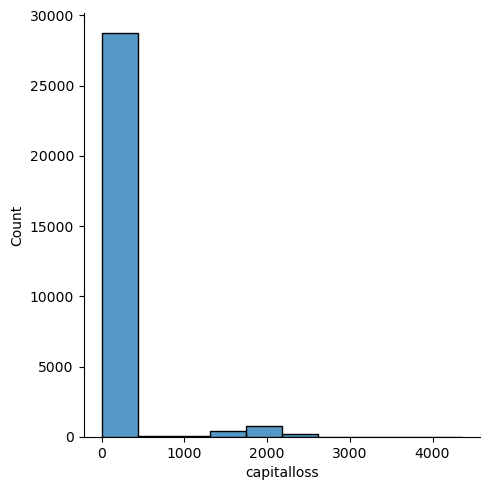

In [22]:
sns.displot(data2['capitalloss'],bins=10,kde=False)

In [23]:
#LOGISTIC REGRESSION
# reindexing the salary status names to 0,1
data2['SalStat']=data2['SalStat'].map({' less than or equal to 50,000':0,' greater than 50,000':1})
print(data2['SalStat'].unique())

[0 1]


/var/folders/cy/bp0mb2rn0256sptt230gsw1r0000gn/T/ipykernel_34521/1060587206.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['SalStat']=data2['SalStat'].map({' less than or equal to 50,000':0,' greater than 50,000':1})


In [24]:
new_data=pd.get_dummies(data2, drop_first=True)

In [25]:
#Storing the column names 
column_list=list(new_data.columns)
# print(column_list)

#Seperating the input names from data
features=list(set(column_list)-set(['SalStat']))
# print(features)

#storing the column values in Y
y=data2['SalStat'].values
print(y)

#storing the input values from features in X
x=new_data[features].values
print(x)

[0 0 1 ... 0 0 0]
[[False True False ... False False False]
 [False True True ... False False False]
 [False True False ... False False False]
 ...
 [False True False ... False False False]
 [False True False ... False False False]
 [False True False ... False False False]]


In [26]:
#splitting the data into train and test

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=0)

In [27]:
#make an instance of the model
logistic=LogisticRegression()

# fitting the values for x and y
logistic.fit(train_x,train_y)
logistic.coef_
logistic.intercept_

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([-1.04001717])

In [28]:
# prediction from test data
prediction = logistic.predict(test_x)

#confusion matrix
confusion_matrix= confusion_matrix(test_y, prediction)
print(confusion_matrix)

#calculating the accuracy
accuracy_score= accuracy_score(test_y, prediction)
print(accuracy_score)

#Printing the misclassified values from prediction
print('Misclassified samples: %d' % (test_y != prediction).sum())

[[6293  530]
 [ 953 1273]]
0.8361144877887059
Misclassified samples: 1483


In [29]:
 #LOGISTIC REGRESSION - REMOVING INSIGNIFICANT VARIABLES

cols=['gender','nativecountry','race','JobType']
data2= data2.drop(cols,axis=1)
      
new_data1=pd.get_dummies(data2, drop_first=True)

#Storing the column names 
column_list=list(new_data1.columns)
print(column_list)

#Seperating the input names from data
features=list(set(column_list)-set(['SalStat']))
print(features)

#storing the column values in Y
y1=new_data1['SalStat'].values
print(y1)

#storing the input values from features in X
x1=new_data1[features].values
print(x1)

#splitting the data into train and test

train_x1,test_x1,train_y1,test_y1=train_test_split(x1,y1,test_size=0.3,random_state=0)

#make an instance of the model
logistic1=LogisticRegression()

# fitting the values for x and y
logistic1.fit(train_x1,train_y1)
logistic1.coef_
logistic1.intercept_


# prediction from test data
prediction1 = logistic1.predict(test_x1)

['age', 'capitalgain', 'capitalloss', 'hoursperweek', 'SalStat', 'EdType_ 11th', 'EdType_ 12th', 'EdType_ 1st-4th', 'EdType_ 5th-6th', 'EdType_ 7th-8th', 'EdType_ 9th', 'EdType_ Assoc-acdm', 'EdType_ Assoc-voc', 'EdType_ Bachelors', 'EdType_ Doctorate', 'EdType_ HS-grad', 'EdType_ Masters', 'EdType_ Preschool', 'EdType_ Prof-school', 'EdType_ Some-college', 'maritalstatus_ Married-AF-spouse', 'maritalstatus_ Married-civ-spouse', 'maritalstatus_ Married-spouse-absent', 'maritalstatus_ Never-married', 'maritalstatus_ Separated', 'maritalstatus_ Widowed', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'occupation_ Other-service', 'occupation_ Priv-house-serv', 'occupation_ Prof-specialty', 'occupation_ Protective-serv', 'occupation_ Sales', 'occupation_ Tech-support', 'occupation_ Transport-moving', 'relationship_ Not-in-family', 'relationship_ Other-rel

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
#confusion matrix
confusion_matrix1= confusion_matrix(test_y1, prediction1)
print(confusion_matrix1)

#calculating the accuracy
accuracy_score1= accuracy_score(test_y1, prediction1)
print(accuracy_score1)

#Printing the misclassified values from prediction
print('Misclassified samples: %d' % (test_y1 != prediction1).sum())

[[6317  506]
 [ 981 1245]]
0.8356724499944745
Misclassified samples: 1487


In [31]:
#KNN CLASSIFIER MODEL

from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

KNN_classifier = KNeighborsClassifier(n_neighbors = 5)
KNN_classifier.fit(train_x,train_y)

prediction2= KNN_classifier.predict(test_x)

#Performancce metrics check
confusion_matrix2= confusion_matrix(test_y, prediction2)
print(confusion_matrix2)
 
#calculating the accuracy
accuracy_score2= accuracy_score(test_y, prediction2)
print(accuracy_score2)

[[6176  647]
 [ 808 1418]]
0.8392087523483258


In [32]:
Misclassified_sample=[]
# Calculating error for K values between 1 and 20
for i in range (1,20):
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(train_x,train_y)
        pred_i = knn.predict(test_x)
        Misclassified_sample.append((test_y != pred_i).sum())
        
print(Misclassified_sample)

[1766, 1516, 1522, 1437, 1455, 1455, 1456, 1452, 1481, 1432, 1465, 1446, 1451, 1435, 1421, 1415, 1435, 1423, 1443]
